In [1]:
import pandas as pd
import json
import datetime as dt
import os
import sys
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
data_path = '../data/interim/'

# Activities 
1. descriptive statistics of calories, steps, average heart rate, druation: 
2. distributions of heart rate zones, box plots / histograms idk
3. start time distributions

In [4]:
activities_df = pd.read_csv(data_path + 'initial_clean_activities.csv')

In [5]:
activities_df

,activityTypeId,activityName,calories,steps,averageHeartRate,duration,activeDuration,startTime,hrz_OutofRange_calories,hrz_FatBurn_calories,hrz_Cardio_calories,hrz_Peak_calories,hrz_OutofRange_minutes,hrz_FatBurn_minutes,hrz_Cardio_minutes,hrz_Peak_minutes
0,90013,Walk,562,4874.0,129.0,3840000,3840000,2023-11-25T18:59:25.000-05:00,10.698376,68.365232,494.604188,0.0,0,10,54,0
1,90013,Walk,125,1142.0,104.0,1024000,1024000,2023-11-27T14:21:24.000-05:00,40.445080,93.676024,0.000000,0.0,4,13,0,0
2,90009,Run,65,536.0,110.0,552000,546000,2023-11-29T10:54:56.000-05:00,15.264756,43.315376,6.523400,0.0,3,5,1,0
3,90013,Walk,186,1615.0,124.0,1229000,1229000,2023-11-29T16:05:01.000-05:00,11.481184,104.374400,82.194840,0.0,0,12,8,0
4,90013,Walk,135,1405.0,107.0,972000,972000,2023-11-30T11:18:52.000-05:00,54.927028,78.802672,9.654632,0.0,6,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,90013,Walk,121,1103.0,101.0,1077000,1077000,2024-11-12T16:43:27.000-05:00,105.548058,21.932064,0.000000,0.0,14,3,0,0
438,90013,Walk,142,1468.0,123.0,1024000,1024000,2024-11-12T22:07:47.000-05:00,8.224524,142.184574,0.000000,0.0,1,16,0,0
439,90013,Walk,137,1618.0,110.0,1074000,1074000,2024-11-13T14:10:30.000-05:00,114.520266,31.402728,0.000000,0.0,13,4,0,0
440,90013,Walk,99,1167.0,104.0,972000,972000,2024-11-13T18:27:24.000-05:00,92.962044,14.704452,0.000000,0.0,13,3,0,0


In [11]:
activities_df['duration'] = pd.to_numeric(activities_df['duration'] / 60000)
activities_df['activeDuration'] = pd.to_numeric(activities_df['activeDuration'] / 60000)

In [12]:
activities_df.describe()

,activityTypeId,calories,steps,averageHeartRate,duration,activeDuration,hrz_OutofRange_calories,hrz_FatBurn_calories,hrz_Cardio_calories,hrz_Peak_calories,hrz_OutofRange_minutes,hrz_FatBurn_minutes,hrz_Cardio_minutes,hrz_Peak_minutes
count,442.000000,442.000000,436.000000,441.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,84026.531674,207.737557,2147.160550,110.746032,27.654374,27.654148,132.509651,51.909632,29.408831,2.177012,16.929864,6.742081,3.346154,0.223982
std,20817.885972,164.153139,1590.812367,13.805101,20.195727,20.195935,107.686737,66.302039,106.970714,18.554296,15.125689,8.655487,11.541706,1.925380
min,1071.000000,43.000000,331.000000,82.000000,9.200000,9.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90013.000000,127.000000,1368.500000,102.000000,17.066667,17.066667,70.343795,5.205040,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000
50%,90013.000000,156.000000,1660.000000,109.000000,20.483333,20.483333,117.568841,30.847360,0.000000,0.000000,15.000000,4.000000,0.000000,0.000000
75%,90013.000000,215.000000,2125.250000,117.000000,28.791667,28.791667,159.207534,74.143685,8.588316,0.000000,20.000000,10.000000,1.000000,0.000000
max,90013.000000,1526.000000,13678.000000,172.000000,163.033333,163.033333,1019.467134,467.302500,1030.682394,267.172416,140.000000,65.000000,112.000000,27.000000


1. Steps is not recorded for a few activities
2. The average calories i burn in any activity is 207 calories, with the min being 43 and the max being 1500.
3. My averageHeartRate in my activities is 110 bpm and the min is 82, max being 172. 
4. most of my heartzone calories are from hrz out of range then fatburn then cardio then peak.
5. resting zone: 0-100, fatburn: 100-138, cardio zone: 138-168, peak zone: 168-200
6. I spend most of my time out of range, below the range to be counted activezoneminutes (fat, cardio, peak), meaning most of my activities are in "resting zones" which is not considered activezoneminutes. 
7. Same pattern with the hrz minutes, which actually seems it indicate that my activities are very short.

/Users/saatvik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


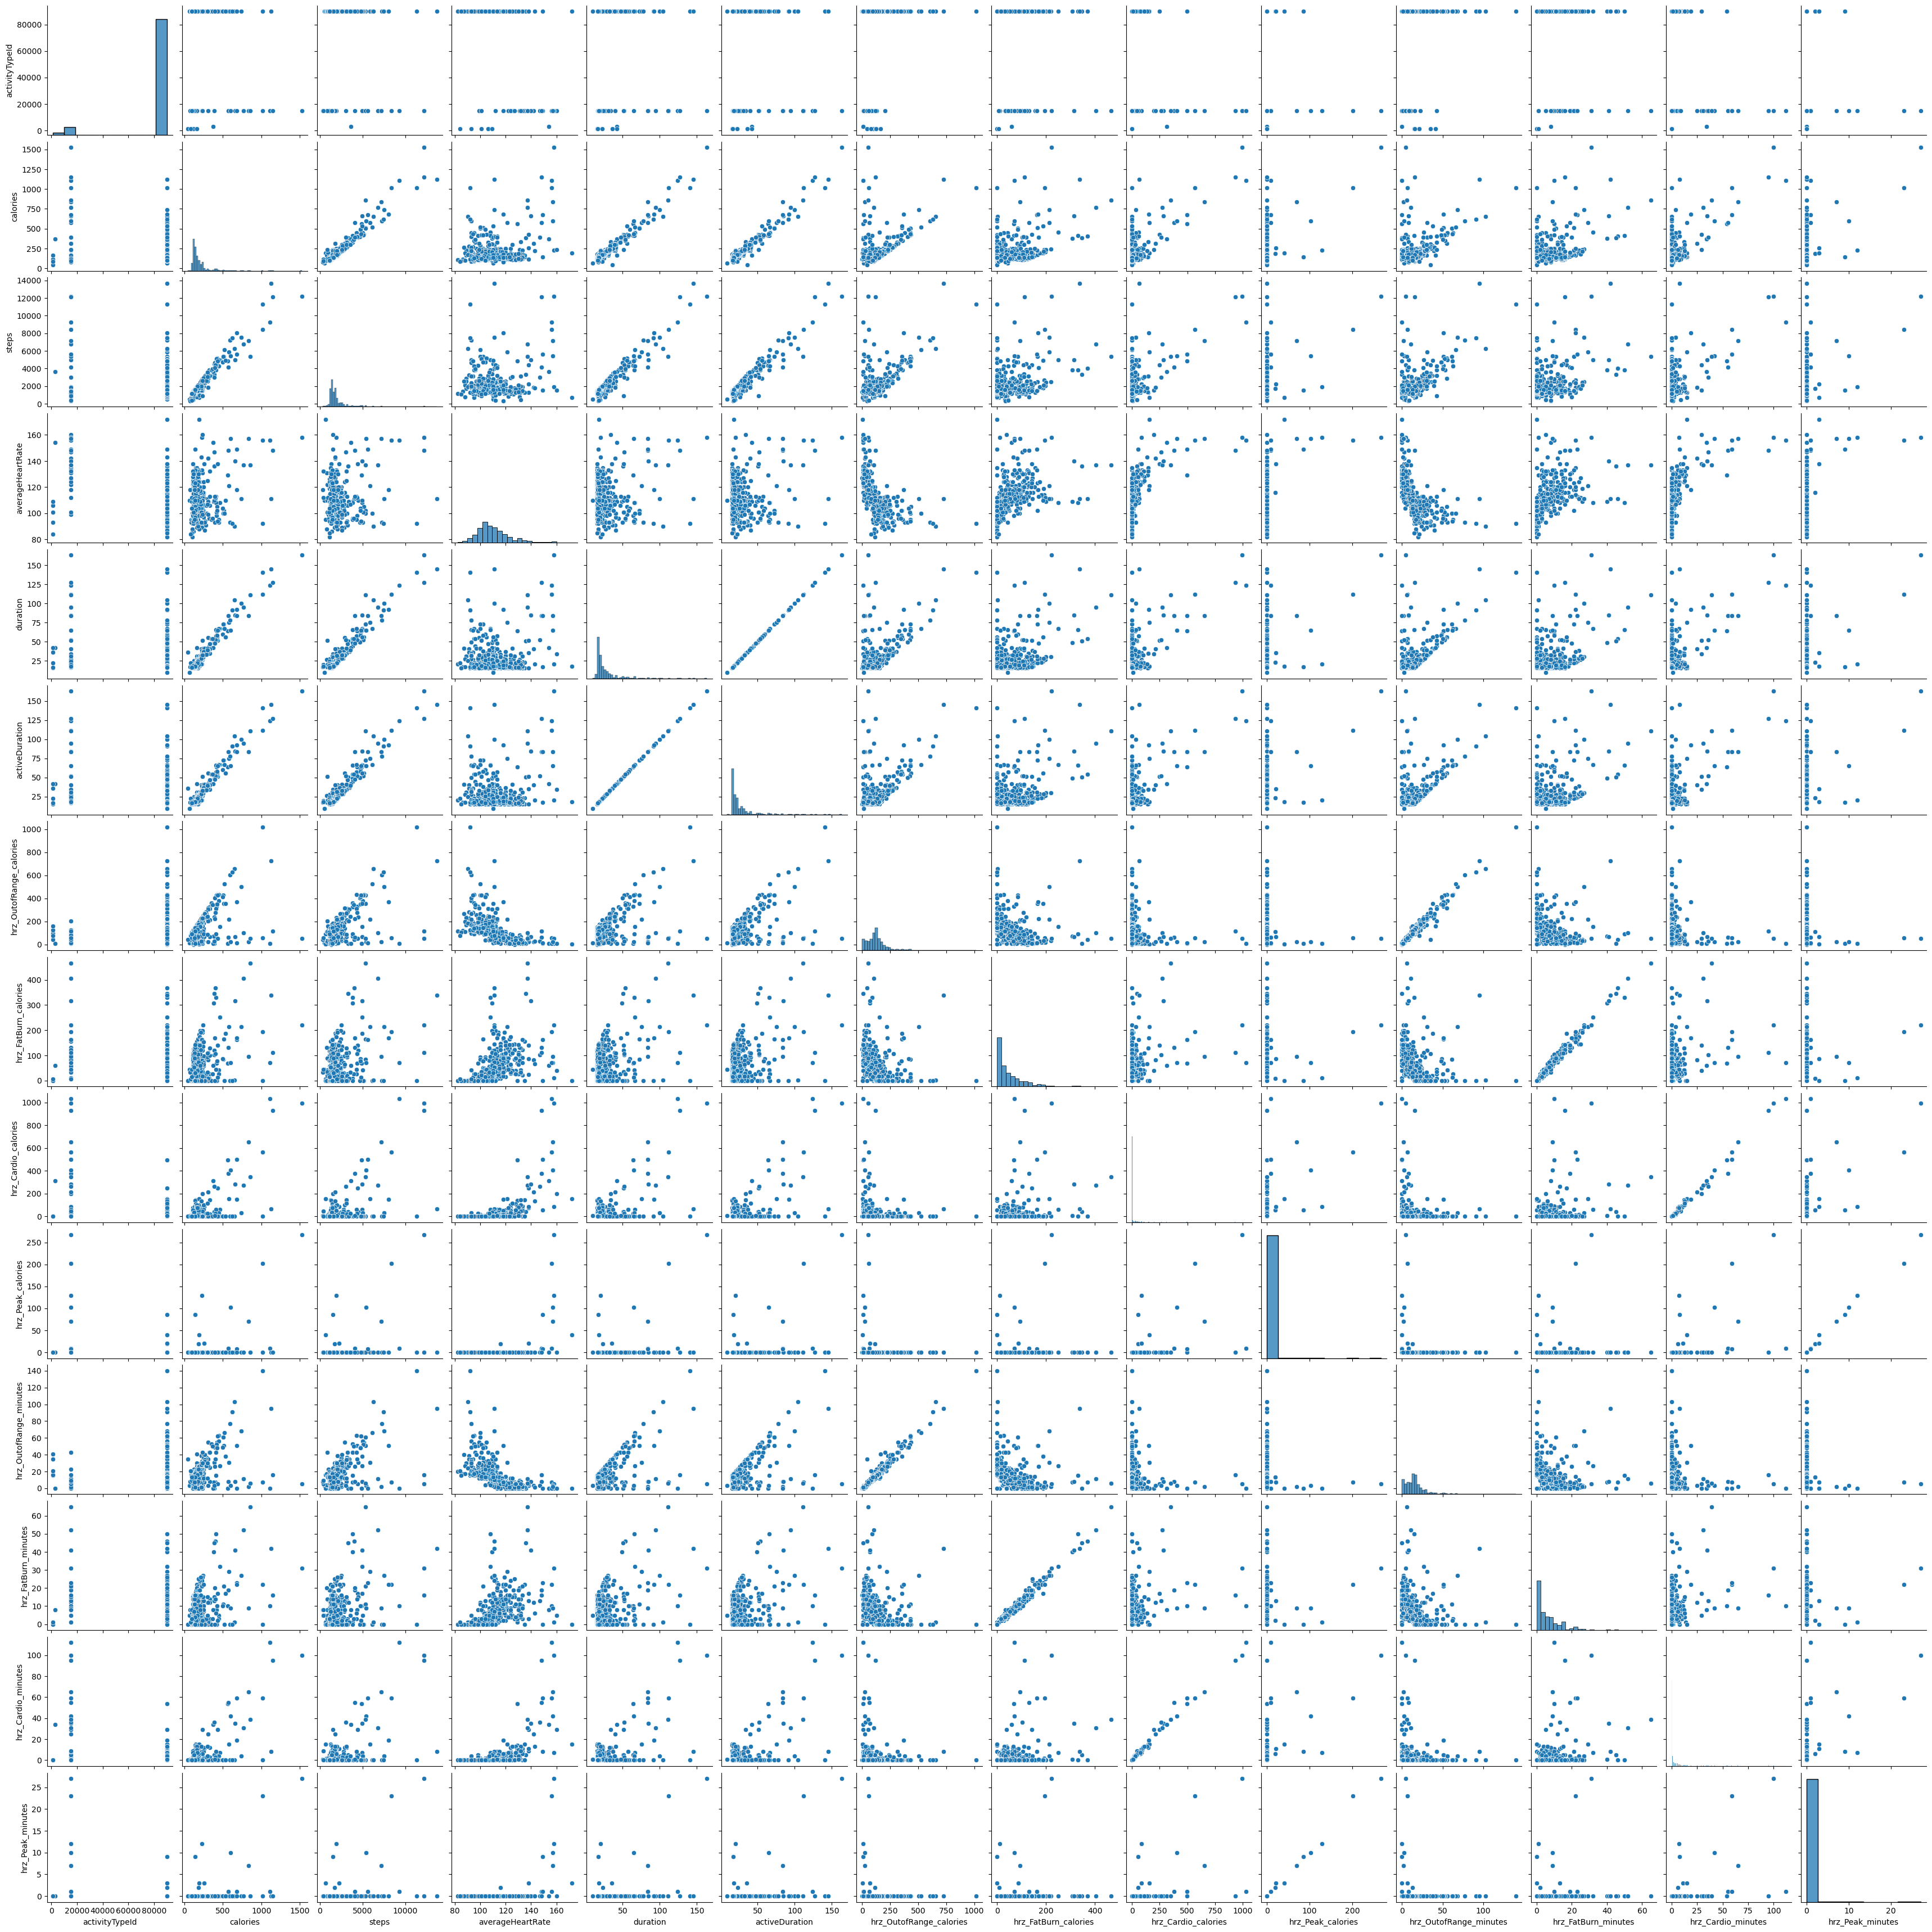

In [13]:
#scatter_matrix(activities_df, alpha=0.8, figsize=(12, 12), diagonal='kde')
sns.pairplot(activities_df)

plt.show()


1. Things worth exploring:
hrz_outofzone_calories with steps, duration, activeduration, 
2. It's clear that if ang heart zones increase the fatburn calories increase exponentially and out of range decreases exponentially. but cardio and peak show a weaker non-linear relationship. 
3. Many of the rest are linear relationships or no relationships. 

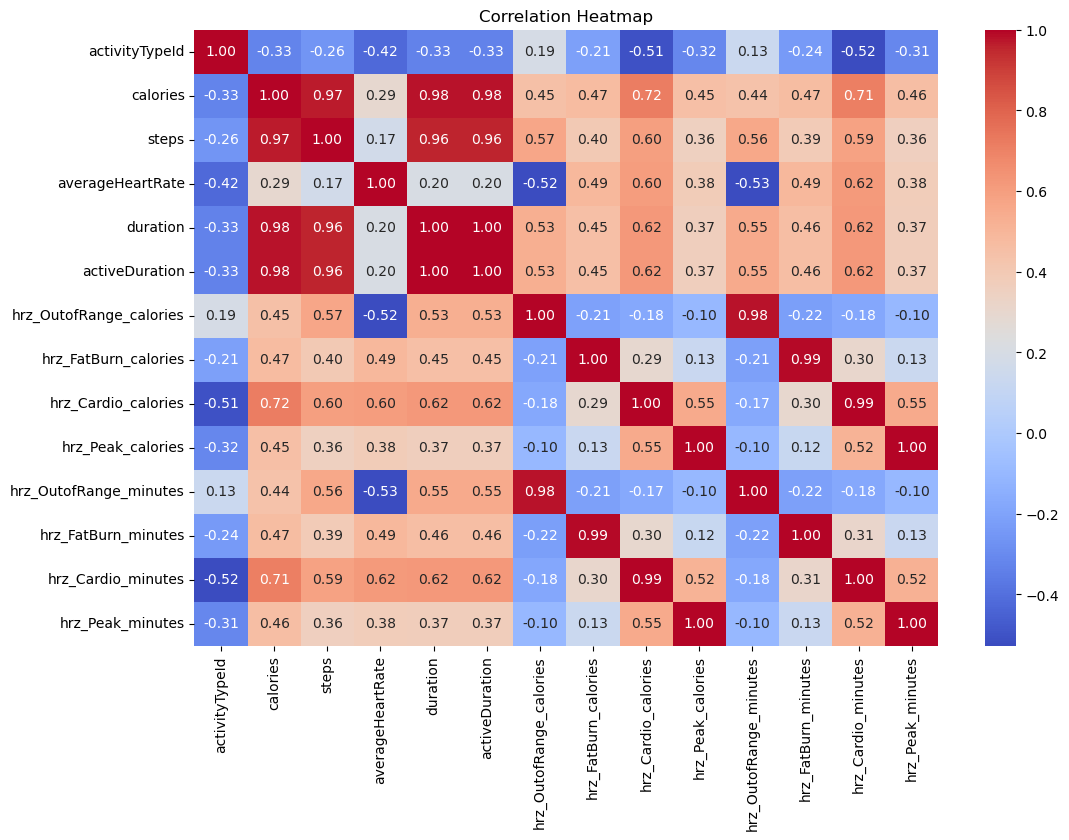

In [14]:
activities_numeric_df = activities_df.select_dtypes(include="number")

activities_corr = activities_numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(activities_corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


1. Calories has a strong positive correlation withy cardio minutes, calories, steps, duration
2. Steps also have a positive correlation with duration
3. average hear rate has half negative correlation with out of range calories
4. hrz cardio has the strongest correlation with calories than the rest of the zones 

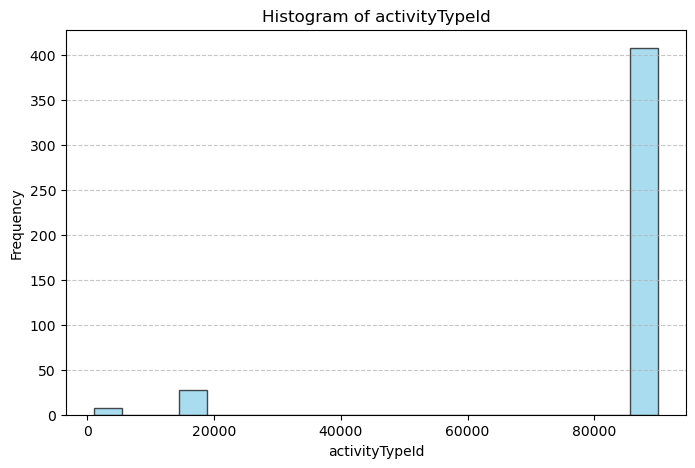

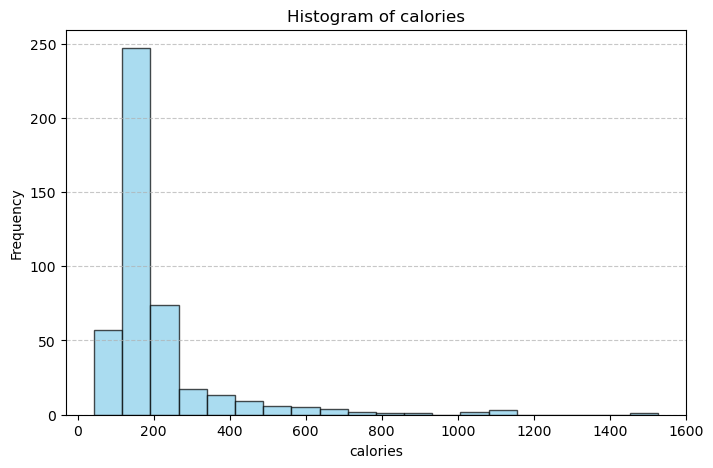

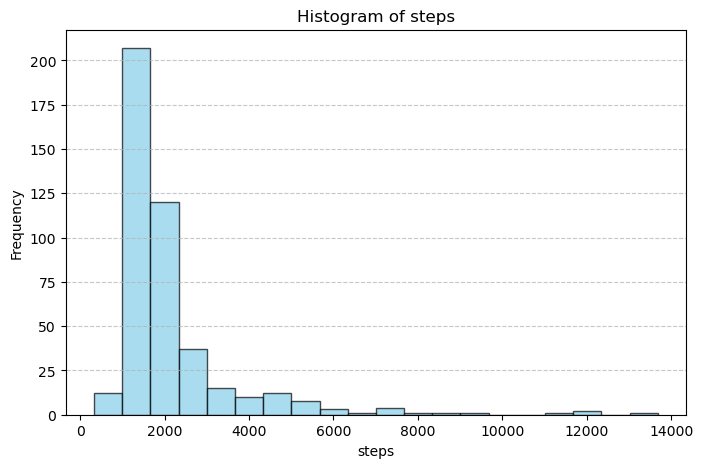

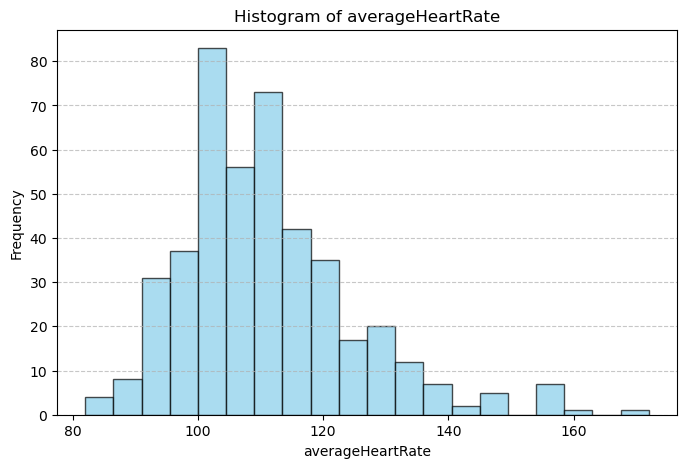

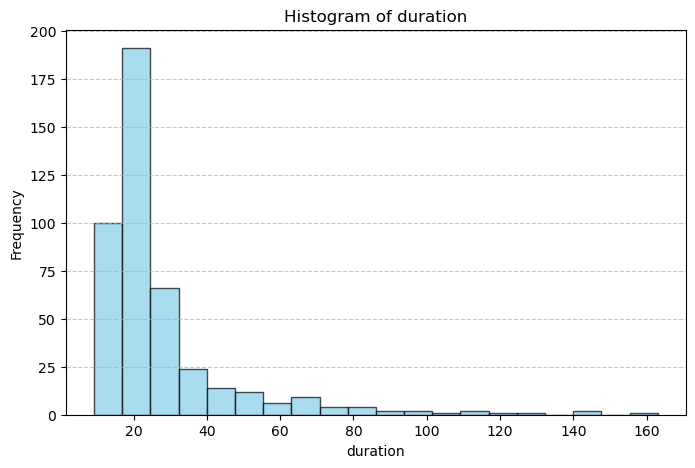

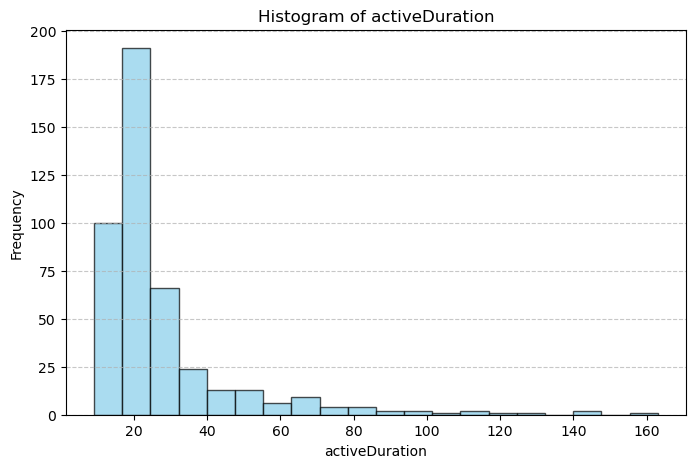

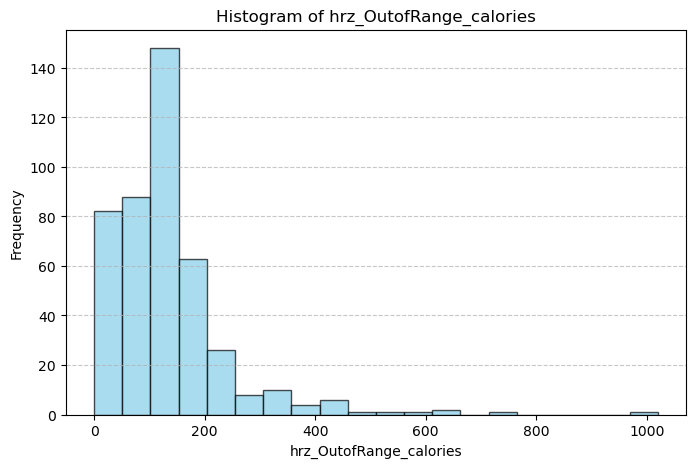

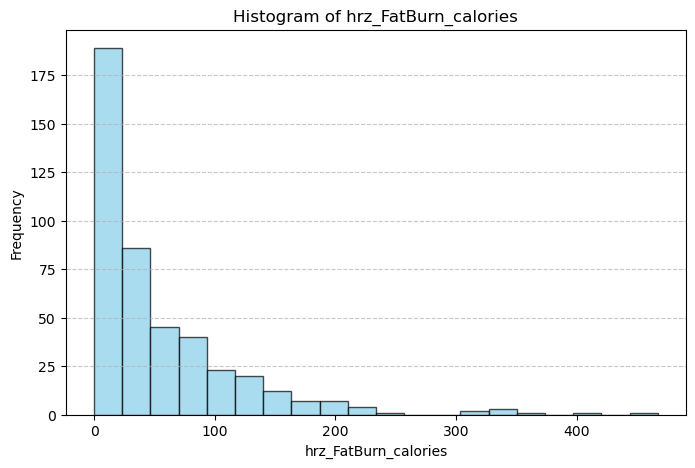

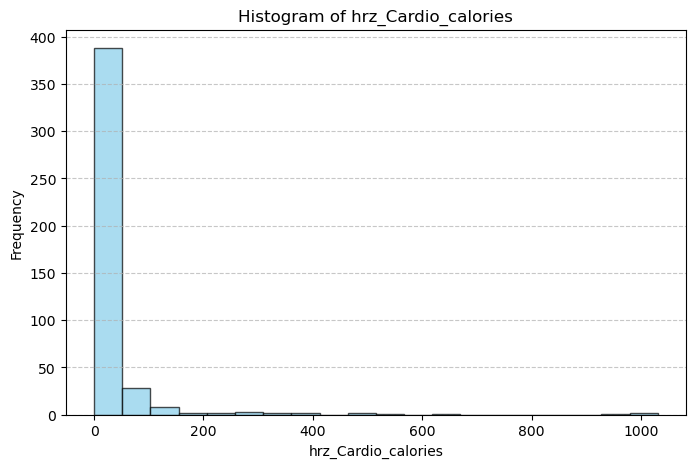

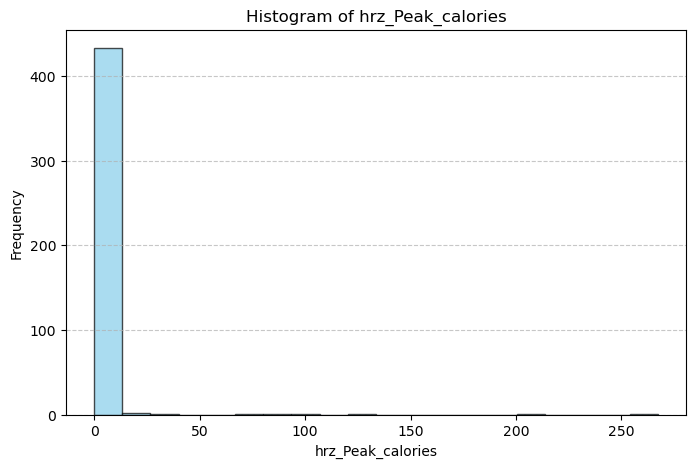

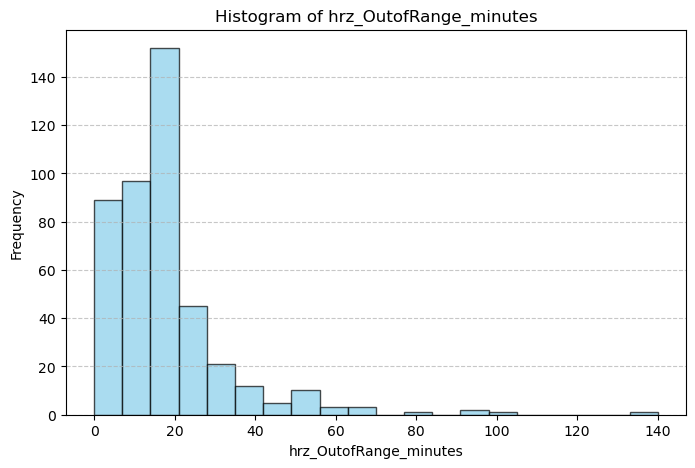

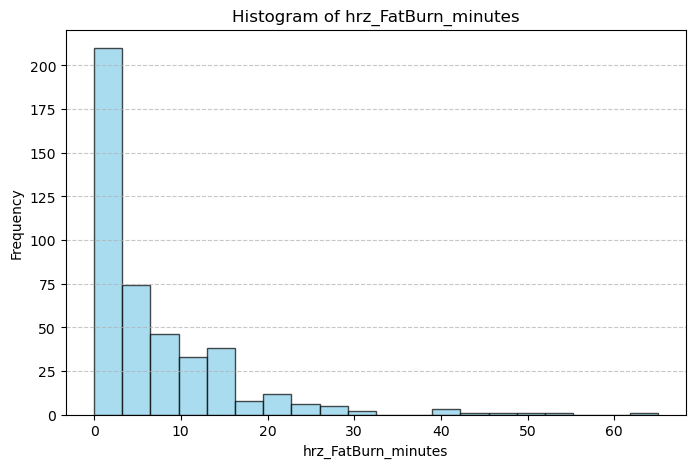

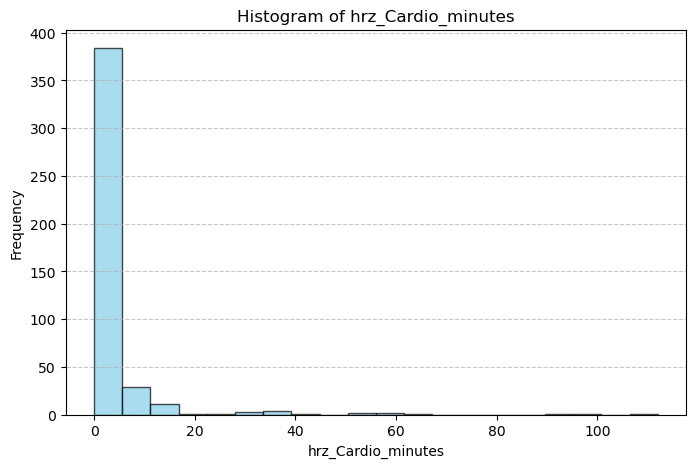

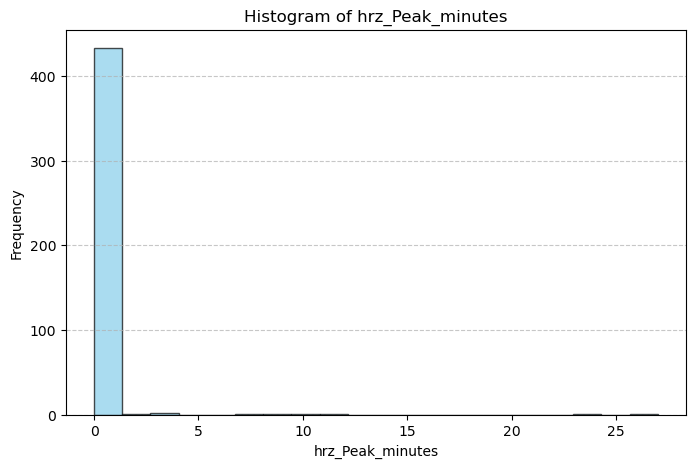

In [15]:
def histogram_plot(col, col_name):
    plt.figure(figsize=(8, 5))
    plt.hist(col.dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
for col_name in activities_numeric_df.columns:
    histogram_plot(activities_numeric_df[col_name], col_name)

There are a lot of outliers in this dataset, so I am going to make sure that I study those.

1. Per activity the common range is 100-270 calories 
2. Steps are around 2000, with the spike in frequency  <2000, and diminishes very quickly after 2500
3. Avg heartrate slight right tail skew norm distribution, mainly being from 90-120, remember that fat burn zone is from 100 - 140, and anything less than 100 is out of range. 
4. Main duration is 10-20-30 minutes, main spike being 20 minutes. 
5. hrz out of range burns 0-200 calories with main being a little less than <200 
6. hrz cardio calories <100 mainly, but has the highest correlation with calories in general.
7. hrz peak calories mainly 0, fatburn minutes 0-15, mainly 0, hrz carido and peak minutes as well

### how is hrz cardio minutes less than 20 minutes mainly, hrz cardio calories is < 200, mainly 0-80ish, and it has the highest correlation with calories out of all the zones?

Explore this question after looking at start time distributions 

Want to look at day of the week distributions, month, wekk of the month (1st, 2nd week etc.)